In [ ]:
# its kaggle default environment
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### imports

In [ ]:
#!pip install timm
# in this competition internets doesnt available
# need to add all by data imports in notebook

In [ ]:
import pandas as pd
import sys
sys.path.append('../input/timm-pytorch-image-models/pytorch-image-models-master')
from timm import create_model 

# Our first task - is check what data we have

In [ ]:
traindf = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
traindf.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


We see image pararameters and our task - score.

Look at images:

In [ ]:
import os
from PIL import Image
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if 'jpg' in filename:
            jpg = Image.open(os.path.join(dirname, filename))
            width, height = jpg.size
            print(width,height)
            break

128 128
720 960


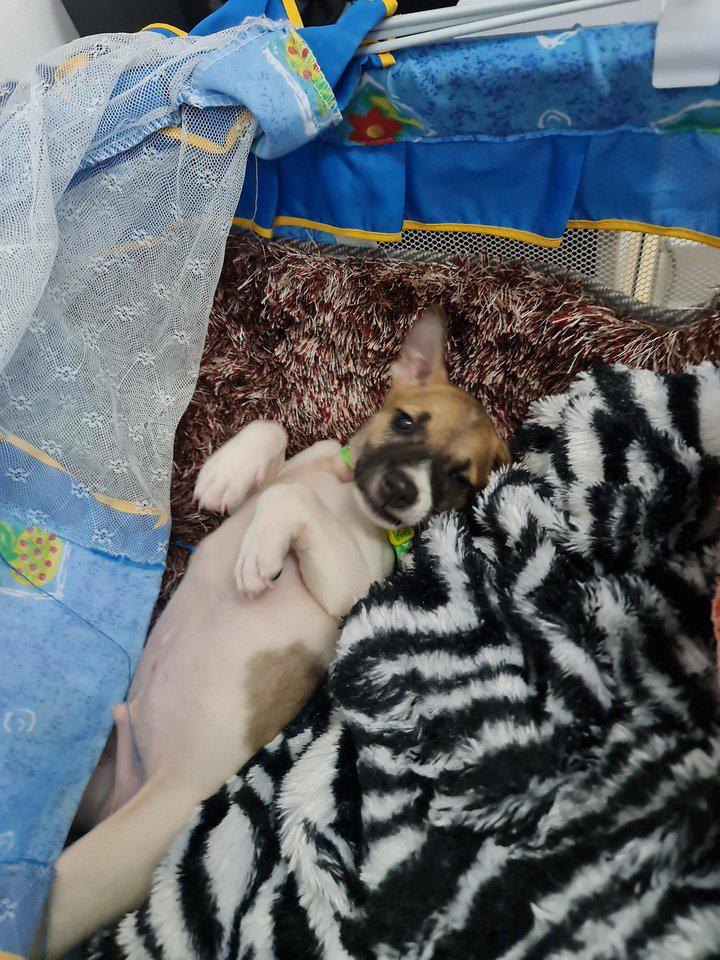

In [ ]:
jpg

## Let's see at average score

The mean score is 38.03904358353511
The median score is 33.0
The standard deviation of score is 20.59199010577444


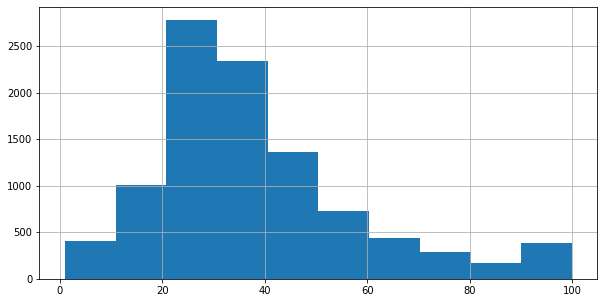

In [ ]:
traindf['Pawpularity'].hist(figsize = (10, 5))
print(f"The mean score is {traindf['Pawpularity'].mean()}")
print(f"The median score is {traindf['Pawpularity'].median()}")
print(f"The standard deviation of score is {traindf['Pawpularity'].std()}")

In [ ]:
print('unique values:', len(set(traindf['Pawpularity'].values)))

unique values: 100


So we have all range of scores.

We have 2 ways:

    - predict 100 classes
    - or normalize it between 0 and 1

In [ ]:
traindf['normed'] = traindf['Pawpularity']/100
traindf['normed'].head()

0    0.63
1    0.42
2    0.28
3    0.15
4    0.72
Name: normed, dtype: float64

## Load our data with fastai.

Name of file + .jpg == path to it

In [ ]:
traindf['image'] = traindf['Id'].map(lambda x:str('../input/petfinder-pawpularity-score/train/'+x+'.jpg'))
traindf = traindf.drop(columns=['Id'])
traindf.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,normed,image
0,0,1,1,1,0,0,1,0,0,0,0,0,63,0.63,../input/petfinder-pawpularity-score/train/000...
1,0,1,1,0,0,0,0,0,0,0,0,0,42,0.42,../input/petfinder-pawpularity-score/train/000...
2,0,1,1,1,0,0,0,0,1,1,0,0,28,0.28,../input/petfinder-pawpularity-score/train/001...
3,0,1,1,1,0,0,0,0,0,0,0,0,15,0.15,../input/petfinder-pawpularity-score/train/001...
4,0,0,0,1,0,0,1,0,0,0,0,0,72,0.72,../input/petfinder-pawpularity-score/train/001...


In [ ]:
from fastai.vision.all import *
dd = ImageDataLoaders.from_df(traindf, # data
                               valid_pct=0.33, #split 
                               fn_col='image', # path to files
                               label_col='normed',
                               y_block=RegressionBlock, #type of target
                               bs=16, #pbatch size
                               num_workers=8, # with -1 model  down
                               item_tfms=Resize(224),
                               batch_tfms=setup_aug_tfms([Brightness(), Contrast(), Hue(), Saturation()]))

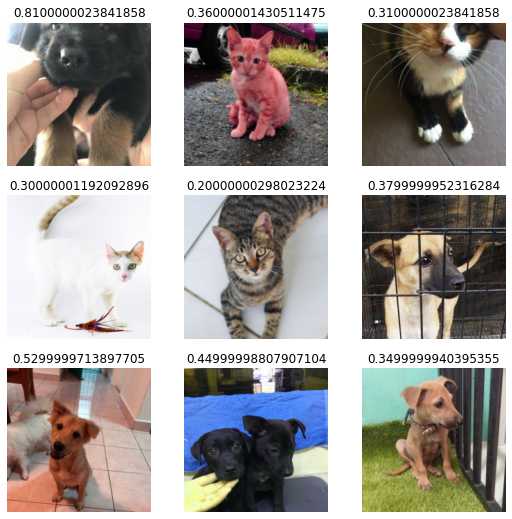

In [ ]:
dd.show_batch()

### Training

### Model 1

### Model 2

### Model 3 

Deep learning variant with FastAi Timm https://timm.fast.ai/

Train a Swin Transformer model as a baseline.

In [ ]:
#!wget https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_base_patch4_window7_224_22kto1k.pth

In [ ]:
# to "offline" use in kaggle
if not os.path.exists('/root/.cache/torch/hub/checkpoints/'):
    os.makedirs('/root/.cache/torch/hub/checkpoints/')
!cp '../input/swin-transformer/swin_large_patch4_window7_224_22kto1k.pth' '/root/.cache/torch/hub/checkpoints/swin_large_patch4_window7_224_22kto1k.pth'

In [ ]:
!pip install timm

ERROR: Could not find a version that satisfies the requirement timm (from versions: none)
ERROR: No matching distribution found for timm


In [ ]:

# it can download model weights by itself
model = create_model('swin_large_patch4_window7_224', pretrained=True, num_classes=dd.c)

/opt/conda/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:2227.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In fastai - trainer class is "Learner", which takes in the data, model, optimizer, loss function, etc. and allows you to train models, make predictions, etc

In [ ]:
#Metric to use
def rmse(input,target):
    return 100*torch.sqrt(F.mse_loss(F.sigmoid(input.flatten()), target))

In [ ]:
learn = Learner(dd, model, loss_func=BCEWithLogitsLossFlat(), metrics=rmse).to_fp16()

we need to find best learning rate, which can be found with fastai's learning rate finder:

SuggestedLRs(valley=4.256162355886772e-05)

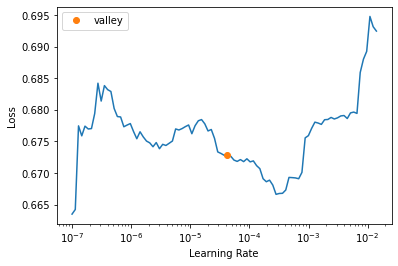

In [ ]:
learn.lr_find(end_lr=3e-2)

In [ ]:
learn.fit_one_cycle(1, 2e-5, cbs=[SaveModelCallback(), EarlyStoppingCallback(monitor='rmse', comp=np.less, patience=3)])

epoch,train_loss,valid_loss,rmse,time
0,0.642717,0.644343,17.414343,05:52


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Better model found at epoch 0 with valid_loss value: 0.6443430781364441.


## Prediction

### Model 1

### Model 2

### Model 3

We make same manupulation with test data to predict.

In [ ]:
test = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')
test.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0


In [ ]:
test['Pawpularity'] = [1]*len(test)
test['image'] = test['Id'].map(lambda x:str('../input/petfinder-pawpularity-score/test/'+x+'.jpg'))
test = test.drop(columns=['Id'])
test_res = dd.test_dl(test)

In [ ]:
prediction, _ = learn.tta(dl=test_res, n=5, beta=0)

In [ ]:
prediction[:10]

tensor([[0.4067],
        [0.3842],
        [0.4015],
        [0.3997],
        [0.4155],
        [0.4019],
        [0.4089],
        [0.3981]])

## Submission and results

Worldwide best kaggle score:

public: 17.48600

private: 16.82256

### Model 1

### Model 2

### Model 3

In [ ]:
ans = pd.read_csv('../input/petfinder-pawpularity-score/sample_submission.csv')
# because we have normed answer - we need to *100
ans['Pawpularity'] = prediction.float().numpy()*100
ans.to_csv('submission.csv',index=False)

#### Kaggle result
Private Score
18.08392

Public Score
18.55236

